In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


Part 1.
-------
- Find some other interesting dataset than the Iris dataset from Kaggle on which you can perform kNN classification
- Run kNN algorithm on that data
- Use the sklearn version
- List 2 interesting use cases for applying kNN algorithm for real world
These may or may not be business cases

Part 2.
-------
- Make experiments on your algorithms with different values of k
- Study the effect of different training/testing split portions on your data (like 80/20 training/testing split)
- Try k-Fold approach

In [2]:
pokemon =  pd.read_csv('../archive/Pokemon.csv')

In [3]:
# pokemon
# pokemon.shape
# pokemon.head(n=10)
# pokemon.tail(n=10)
# pokemon.describe
# pokemon.columns
# pokemon.isnull().sum()
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [4]:
pokemon_type_colors = ['#78C850', # Grass
                    '#F08030', # Fire
                    '#6890F0', # Water
                    '#A8B820', # Bug
                    '#A8A878', # Normal
                    '#A040A0', # Poison
                    '#F8D030', # Electric
                    '#E0C068', # Ground
                    '#EE99AC', # Fairy
                    '#C03028', # Figthing
                    '#F85888', # Psychic
                    '#B8A038', # Rock
                    '#705898', # Ghost
                    '#98D8D8', # Ice
                    '#7038F8', # Dragon
                   
                   ]

C:\Users\jonim\AppData\Local\Temp\ipykernel_21608\367034760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type 1', data=pokemon, palette=pokemon_type_colors)
C:\Users\jonim\AppData\Local\Temp\ipykernel_21608\367034760.py:2: UserWarning: 
The palette list has fewer values (15) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Type 1', data=pokemon, palette=pokemon_type_colors)


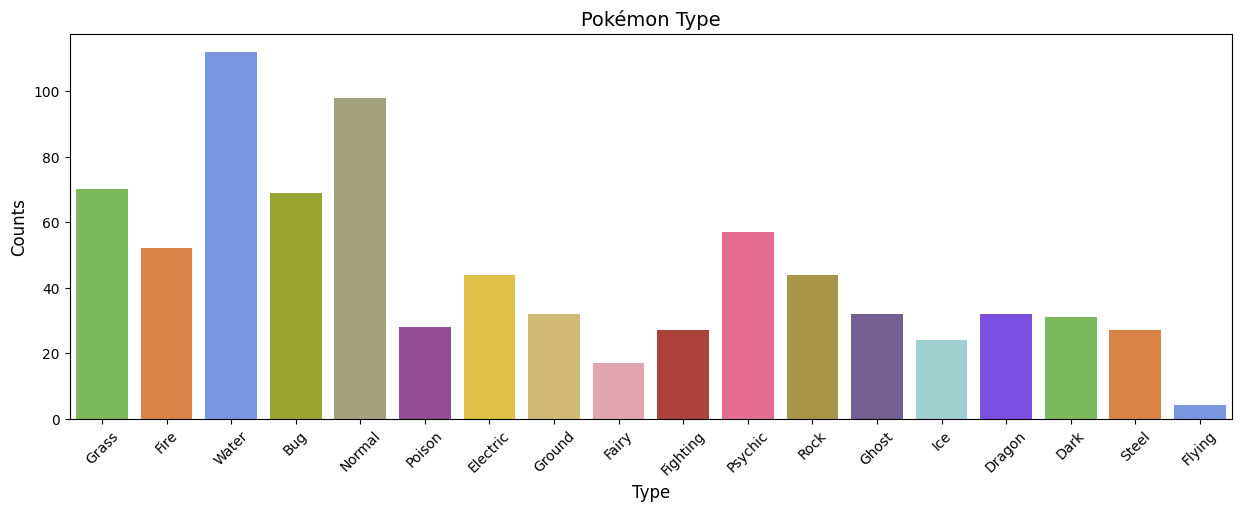

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(x='Type 1', data=pokemon, palette=pokemon_type_colors)
plt.xticks(rotation=45)
plt.title('Pokémon Type', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.show()


In [6]:
pokemon['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

In [7]:
pokemon_2= pokemon.drop(['Total', 'Legendary'], axis=1)

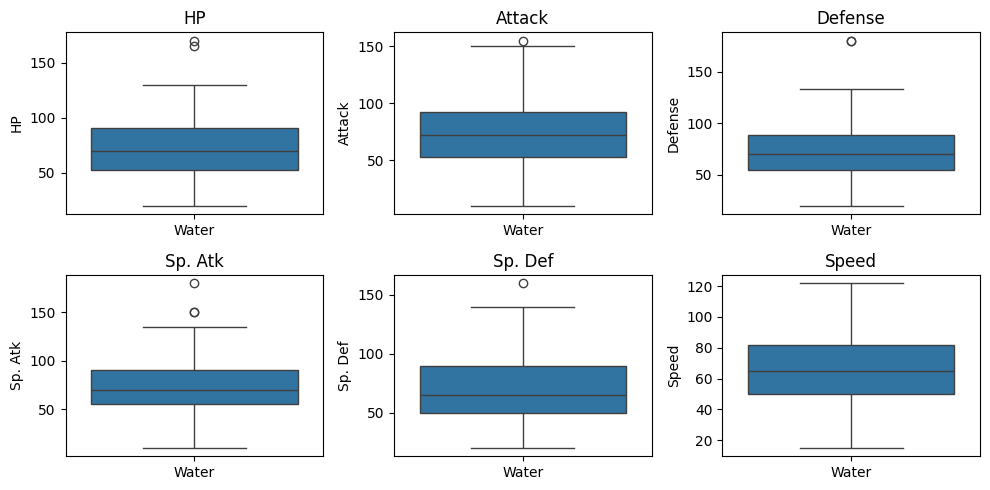

In [8]:
def plot_type_boxplots(pokemon_df, type_name):
    # Stats to plot
    stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    
    # Filter for the specified type
    type_filter = pokemon_df[pokemon_df['Type 1'] == type_name]
    
    # Plot each stat in a separate subplot
    plt.figure(figsize=(10, 5))
    
    for i, stat in enumerate(stats, 1):
        plt.subplot(2, 3, i)  # Arrange plots in a 2x3 grid
        sns.boxplot(data=type_filter, x='Type 1', y=stat)
        
        # Customize each subplot
        plt.title(f'{stat}')
        plt.xlabel("")
        plt.ylabel(stat)
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example usage
plot_type_boxplots(pokemon, 'Water')

# Water  # Normal  # Grass   # Bug    # Psychic   # Fire   # Electric   # Rock  # Dragon    # Ground   # Ghost  # Dark     # Poison  # Steel       
# Fighting    
# Ice         
# Fairy       
# Flying       


In [9]:
# Step 1: Separate the features and target variable
# Selecting numeric features (HP, Defense, Sp. Atk, Sp. Def, Speed) - excluding Attack as it's part of the target
x = pokemon[['HP', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Target variable: 1 if Attack > 100, else 0
y = (pokemon['Attack'] > 100).astype(int)

# Step 2: Split the dataset into training and testing sets
# testaus setin "prosentin" säätäminen vaikuttaa
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

# Step 3: Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Step 4: Loop to test different values of K
# K valuen säätäminen vaikuttaa myös, eli kuinka monen naapurin mukaan tehdään ennustus, kuinka laaja kehä muodostetaan.
for K in range(1, 11):
    # Initialize the k-NN classifier with current K
    knn = KNeighborsClassifier(n_neighbors=K)
    
    # Train the model
    knn.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print accuracy for each value of K
    print(f'Accuracy of k-NN classifier with K={K} for predicting Attack > 100: {accuracy:.2f}')


Accuracy of k-NN classifier with K=1 for predicting Attack > 100: 0.78
Accuracy of k-NN classifier with K=2 for predicting Attack > 100: 0.81
Accuracy of k-NN classifier with K=3 for predicting Attack > 100: 0.76
Accuracy of k-NN classifier with K=4 for predicting Attack > 100: 0.79
Accuracy of k-NN classifier with K=5 for predicting Attack > 100: 0.78
Accuracy of k-NN classifier with K=6 for predicting Attack > 100: 0.76
Accuracy of k-NN classifier with K=7 for predicting Attack > 100: 0.76
Accuracy of k-NN classifier with K=8 for predicting Attack > 100: 0.74
Accuracy of k-NN classifier with K=9 for predicting Attack > 100: 0.74
Accuracy of k-NN classifier with K=10 for predicting Attack > 100: 0.76
